<a href="https://colab.research.google.com/github/saeedabi1/SP20_CMPE_257_Machine_Learning/blob/master/Midterm_Mirsaeid_Abolghasemi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SP20: CMPE-257 Sec 49 - Machine Learning - Midterm - Mirsaeid Abolghasemi

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Business case and value

After sending a loan application to a bank, the bank makes a decision to approve or reject the request based on the applicant’s personal and official background information. 
Banks may categorize the decision based on two types of credit risk : 
"good"= 1 or "bad"= 0 

Good credit risk means the person(applicant) more likely can repay the loan. So, in the case of business not giving the person a loan makes a business loss to the bank.  


Bad credit risk means the person (applicant) more likely cannot repay the loan. So, approving and giving that case a loan results in a financial loss for the bank.

Therefor to the Objective function is to minimize the business risk and maximize the profit for the bank. In nutshell, the decision making to approve or reject a loan request has a key rule for a bank.

# Data narrative

One of the examples of a bank dataset is the German Credit Dataset which contains data on 20 variables and the credit risk that shows an applicant has a Good or Bad credit risk for 1000 loan applicants.

Creating and developing different Machine Learning models on this dataset is expected to help the bank to make a decision to approve or reject the applicant's loan request.


#Reading the data

In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.

# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

#file_id = '1R9ud3aZOGfeaM6DkxkR7B7_tUuRYgo9j'

#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))
#downloaded.GetContentFile('german.data-numeric')

In [0]:
#file_id2 = '1Pm_NbmxENIE6jWNwJW9B4Vi0s0fSIQjg'

#downloaded = drive.CreateFile({'id': file_id2})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))
#downloaded.GetContentFile('german.data')

In [0]:
file_id3 = '1dOT_mVw2E-JauvtttsXqiPAu19MiFowZ'

downloaded = drive.CreateFile({'id': file_id3})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))
downloaded.GetContentFile('german_credit.csv')

In [0]:
df = pd.read_csv('german.data-numeric')

In [0]:
df2 = pd.read_csv('german.data')

In [0]:
df3 = pd.read_csv('german_credit.csv')

In [0]:
df3

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,none,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,none,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,yes
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [0]:
df3.shape

(1000, 21)

# Pre-processing

In [0]:

#df3.columns = ['default', 'credit_risk']
df3.rename({'default': 'credit_risk'}, axis=1, inplace=True)

In [0]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   credit_risk                 1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [0]:
print(df3.isnull().sum())

credit_risk                   0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64


In [0]:
df3.dtypes

credit_risk                    int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [0]:
df3.head()

,credit_risk,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


# Encoding Categorical Feature

In [0]:
# make non-int columns numerical
from sklearn import preprocessing
lb_make = preprocessing.LabelEncoder()
for i in df3.columns:
  #df[i] = lb_make.fit_transform(df[i])
  if df3[i].dtype != np.int64:
    df3[i] = lb_make.fit_transform(df3[i])

In [0]:
df3

,credit_risk,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,1,4,1169,4,0,4,3,2,4,2,67,1,1,2,1,1,1,1
1,1,0,48,3,4,5951,1,2,2,0,2,2,2,22,1,1,1,1,1,0,1
2,0,3,12,1,0,2096,1,3,2,3,2,3,2,49,1,1,1,3,2,0,1
3,0,1,42,3,7,7882,1,3,2,3,1,4,0,45,1,0,1,1,2,0,1
4,1,1,24,2,2,4870,1,2,3,3,2,4,3,53,1,0,2,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3,12,3,7,1736,1,3,3,0,2,4,2,31,1,1,1,3,1,0,1
996,0,1,30,3,3,3857,1,2,4,1,2,4,0,40,1,1,1,0,1,1,1
997,0,3,12,3,4,804,1,0,4,3,2,4,1,38,1,1,1,1,1,0,1
998,1,1,45,3,4,1845,1,2,4,3,2,4,3,23,1,0,1,1,1,1,1


In [0]:
# finding correlation among columns 
df3.corr()

,credit_risk,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
credit_risk,1.000000,-0.302406,0.214927,0.097054,-0.058483,0.154739,-0.129332,0.001805,0.072404,-0.089535,-0.028441,0.002967,0.034011,-0.091127,-0.053862,0.019315,-0.045732,-0.032756,-0.003015,-0.036466,0.082079
account_check_status,-0.302406,1.000000,-0.096005,-0.110683,-0.007687,-0.092638,0.134248,-0.052057,0.029780,0.049073,0.084286,0.008835,-0.032983,0.083636,0.052184,-0.012511,0.084513,-0.029085,0.030417,0.037208,-0.014658
duration_in_month,0.214927,-0.096005,1.000000,0.029430,-0.093921,0.624984,0.072265,0.028078,0.074749,0.099678,-0.006711,0.034067,0.068363,-0.036136,0.003559,-0.157049,-0.011284,-0.215438,-0.023834,0.164718,0.138196
credit_history,0.097054,-0.110683,0.029430,1.000000,0.057882,0.029050,0.001626,0.018060,-0.059779,-0.080282,0.011296,-0.086987,-0.051107,-0.157261,0.040499,0.084026,-0.387820,-0.013921,-0.070008,-0.039237,0.000513
purpose,-0.058483,-0.007687,-0.093921,0.057882,1.000000,-0.088610,-0.041116,0.016664,0.003199,-0.097655,-0.084020,-0.017550,-0.125088,-0.128689,0.038427,0.099185,-0.089907,-0.001895,-0.113761,-0.074844,0.029228
credit_amount,0.154739,-0.092638,0.624984,0.029050,-0.088610,1.000000,0.087976,0.074224,-0.271316,0.114810,-0.037921,0.028926,0.081618,0.032716,-0.020224,-0.135632,0.020795,-0.261139,0.017142,0.276995,0.050050
savings,-0.129332,0.134248,0.072265,0.001626,-0.041116,0.087976,1.000000,-0.043382,-0.001663,0.078204,0.059876,0.093577,-0.035966,0.061369,-0.018960,-0.021146,-0.047965,-0.032630,0.028827,0.079551,0.012946
present_emp_since,0.001805,-0.052057,0.028078,0.018060,0.016664,0.074224,-0.043382,1.000000,-0.105237,-0.053517,-0.035166,-0.161882,-0.054509,-0.177257,0.066824,0.048259,-0.042033,-0.017382,-0.052796,0.007619,-0.009027
installment_as_income_perc,0.072404,0.029780,0.074749,-0.059779,0.003199,-0.271316,-0.001663,-0.105237,1.000000,0.118367,0.014835,0.049302,0.025613,0.058266,0.041423,-0.089405,0.021669,-0.078090,-0.071207,0.014413,0.090024
personal_status_sex,-0.089535,0.049073,0.099678,-0.080282,-0.097655,0.114810,0.078204,-0.053517,0.118367,1.000000,-0.022214,0.020201,0.082633,0.177153,0.006637,-0.245949,0.112438,-0.040375,0.253574,0.078919,-0.049099


# Visualization 

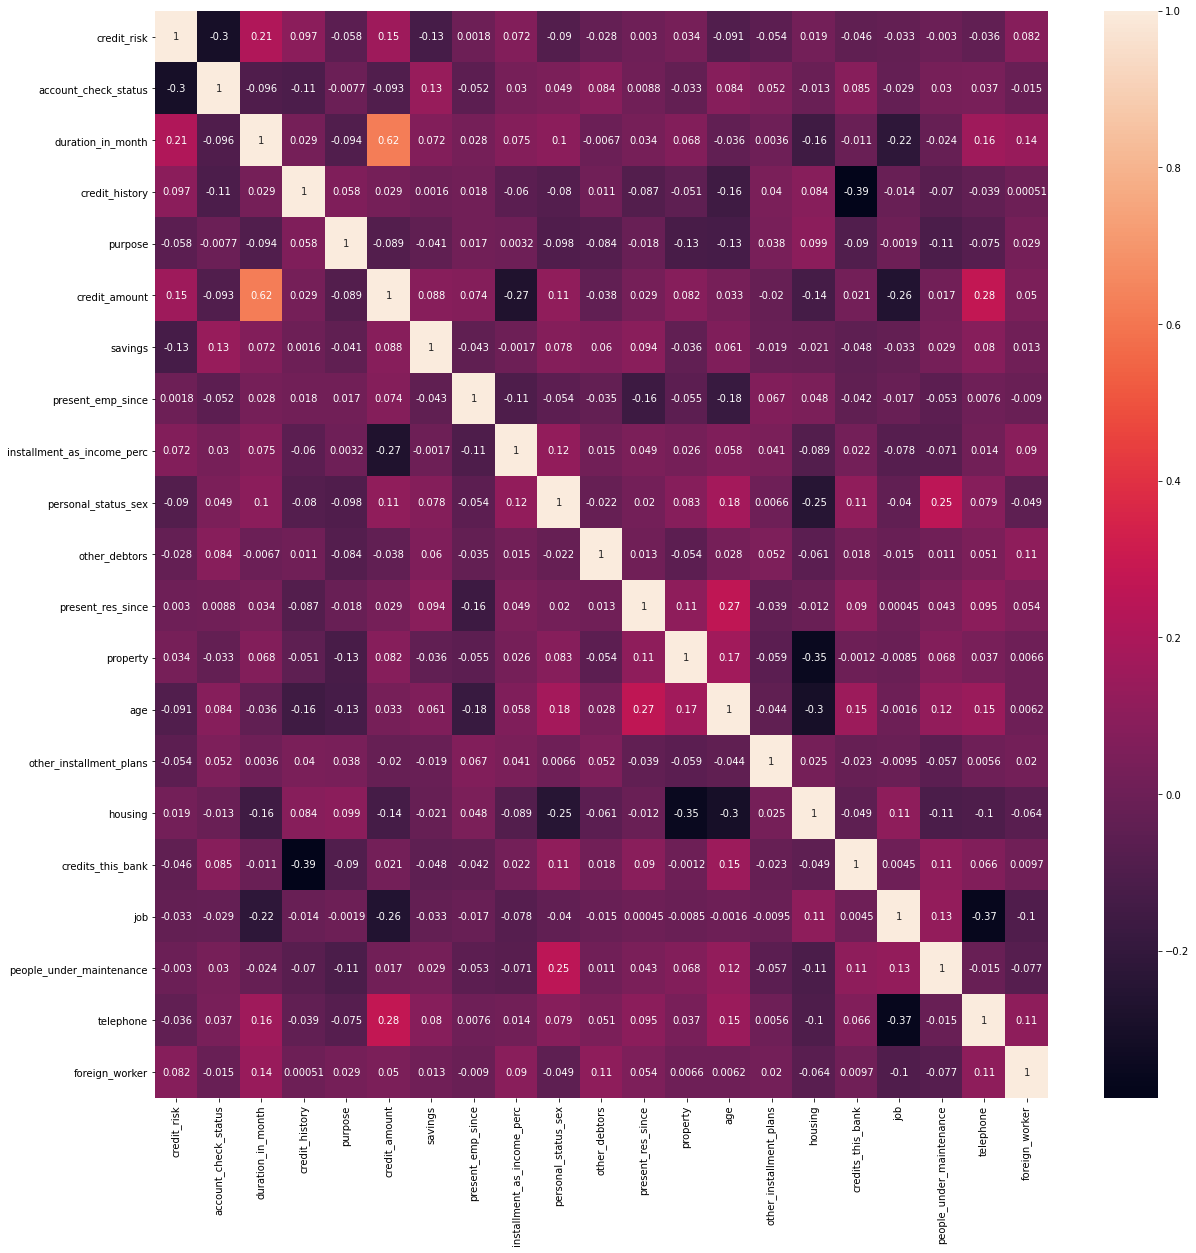

In [0]:
# Heatmap  
plt.figure(figsize=(20,20))
sns.heatmap(df3.corr(), annot = True)

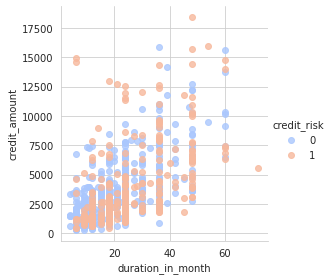

In [0]:
 
# Let's try to predict these 2 clusters for credit risk
sns.set_style('whitegrid')
sns.lmplot('duration_in_month','credit_amount',data=df3, hue='credit_risk',
           palette='coolwarm',height=4,aspect=1,fit_reg=False)



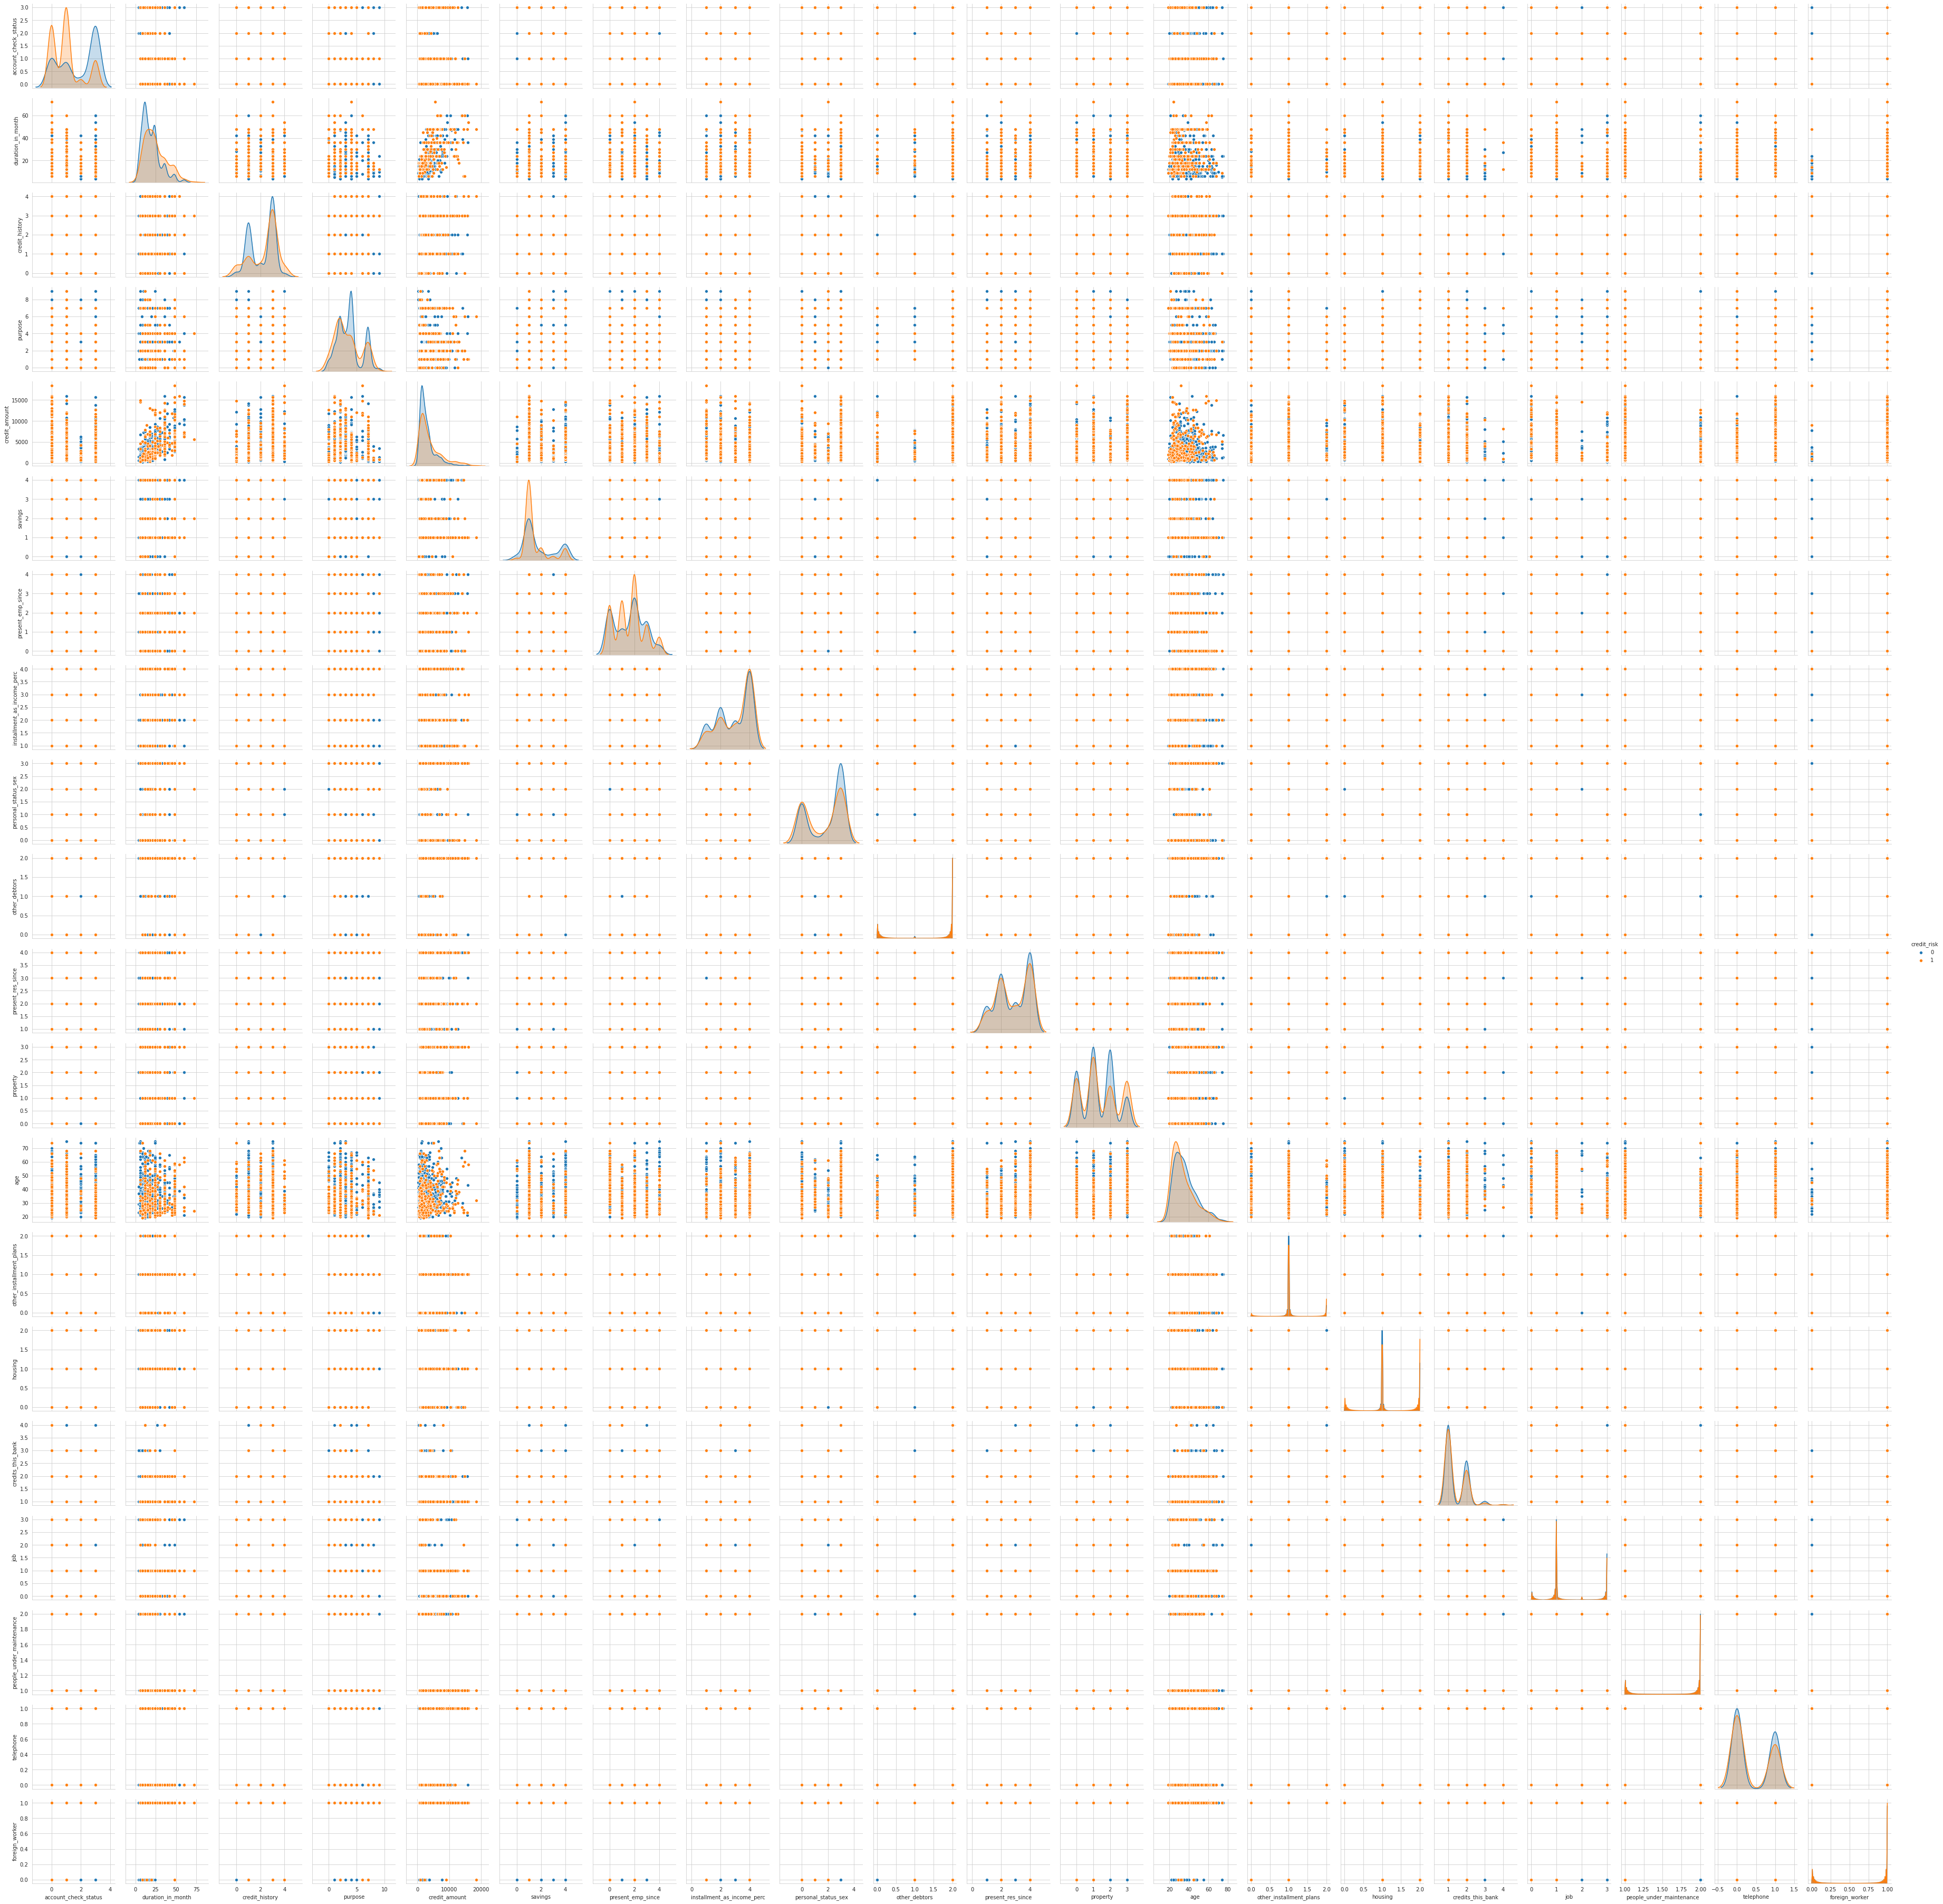

In [0]:
# pairplot
# check other correlations between features visually
g = sns.pairplot(df3, hue='credit_risk')

# Scaling dataset

In [0]:
# scaling dataset
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
df_credit_risk = df3.drop('credit_risk',axis=1)
scaler.fit(df_credit_risk)
scaled_features = scaler.fit_transform(df_credit_risk)

In [0]:
df3_feat = pd.DataFrame(scaled_features,columns=df_credit_risk.columns)
df3_feat.head()

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,-0.464594,-1.236478,-1.146212,0.175588,-0.745131,1.842972,-1.339988,0.918477,0.830971,0.301109,1.046987,0.641411,2.766456,0.218346,-0.133710,1.027079,-0.289639,-0.428290,1.214598,0.196014
1,-1.262865,2.248194,0.734365,0.175588,0.949817,-0.592674,0.314318,-0.870183,-1.390876,0.301109,-0.765977,0.641411,-1.191404,0.218346,-0.133710,-0.704926,-0.289639,-0.428290,-0.823318,0.196014
2,1.131948,-0.738668,-1.146212,-1.672702,-0.416562,-0.592674,1.141471,-0.870183,0.830971,0.301109,0.140505,0.641411,1.183312,0.218346,-0.133710,-0.704926,1.824516,2.334869,-0.823318,0.196014
3,-0.464594,1.750384,0.734365,1.561805,1.634247,-0.592674,1.141471,-0.870183,0.830971,-1.945974,1.046987,-1.356755,0.831502,0.218346,-2.016956,-0.704926,-0.289639,2.334869,-0.823318,0.196014
4,-0.464594,0.256953,-0.205923,-0.748557,0.566664,-0.592674,0.314318,0.024147,0.830971,0.301109,1.046987,1.640495,1.535122,0.218346,-2.016956,1.027079,-0.289639,2.334869,-0.823318,0.196014


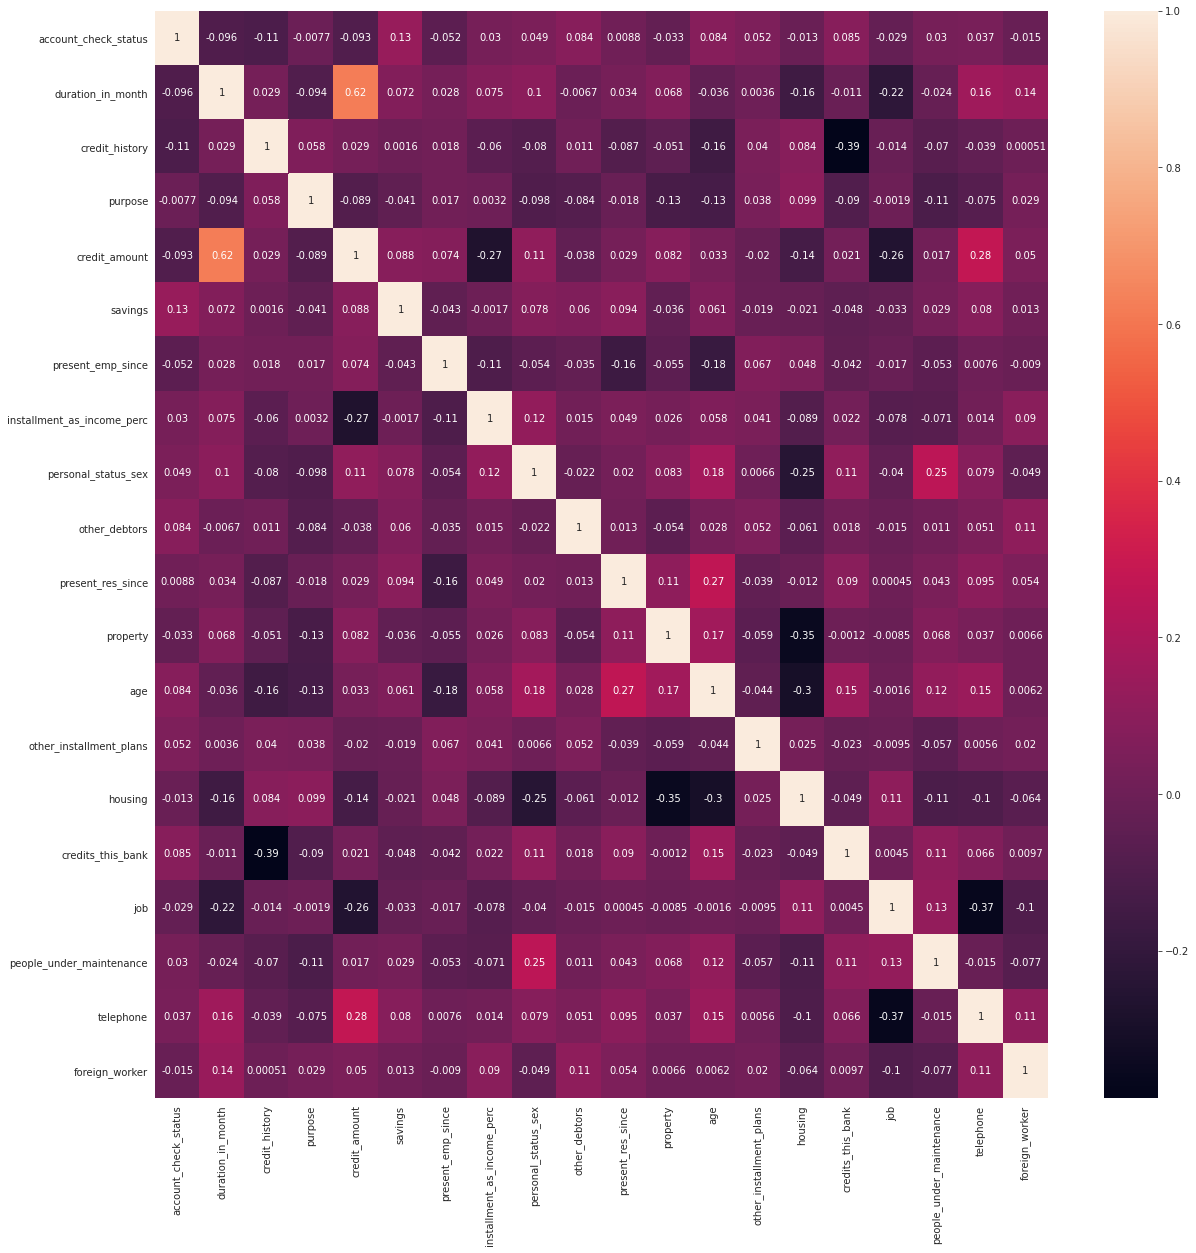

In [0]:
# Heatmap after scaling
plt.figure(figsize=(20,20))
sns.heatmap(df3_feat.corr(), annot = True)

In [0]:
X = df3_feat

In [0]:
X.shape

(1000, 20)

In [0]:
y = df3['credit_risk']

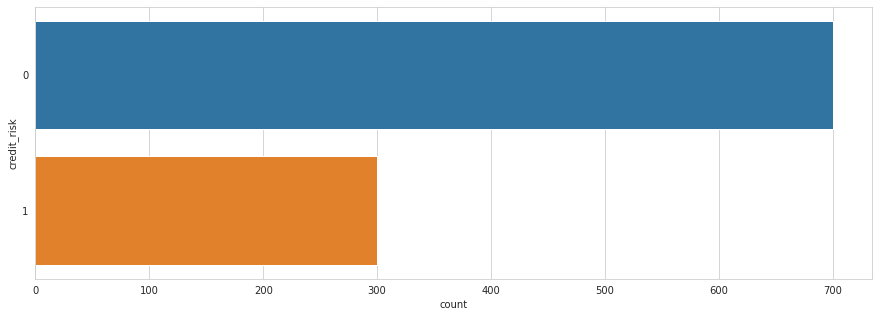

In [0]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'credit_risk' , data = df3)
plt.show()

In [0]:
# Adictionary to save the accuracy of applying an algorithm
accuracy_dictionary = dict()

## Applying different Algorithms:


# 1. Applying PCA

In [0]:
from sklearn.decomposition import PCA
pca_german = PCA(n_components=2)
principalComponents_german = pca_german.fit_transform(X)


principal_german_Df = pd.DataFrame(data = principalComponents_german
             , columns = ['principal component 1', 'principal component 2'])

In [0]:
principal_german_Df

,principal component 1,principal component 2
0,1.973593,-2.565288
1,-0.312761,2.840524
2,0.310945,-2.429452
3,1.566220,1.199933
4,2.801837,-1.724932
...,...,...
995,-2.034850,-0.424172
996,0.617561,1.498096
997,-0.476817,-1.194214
998,1.806364,1.099128


In [0]:
print('Explained variation per principal component: {}'.format(pca_german.explained_variance_ratio_))


Explained variation per principal component: [0.11789873 0.09652805]


<Figure size 432x288 with 0 Axes>

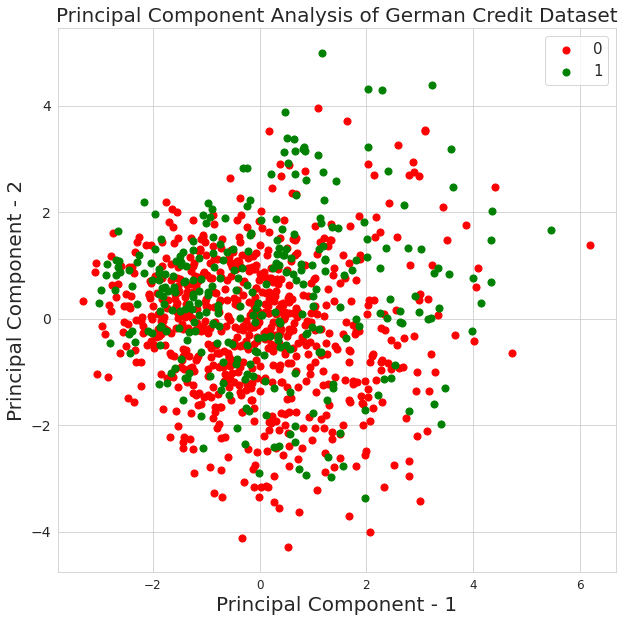

In [0]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of German Credit Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df3['credit_risk'] == target
    plt.scatter(principal_german_Df.loc[indicesToKeep, 'principal component 1']
               , principal_german_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

**Import and Apply PCA on the training dataset**

In [0]:
# Make an instance of the Model
pca_inst = PCA(.95)

In [0]:
#pca_inst.n_components_ 

In [0]:
#X_train_img_pca = pca.transform(X_train)
#X_test_img_pca = pca.transform(X_test)
pca_inst.fit(X)
X_pca = pca_inst.transform(X)




# 2. Applying K-Means

In [0]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Inertia')

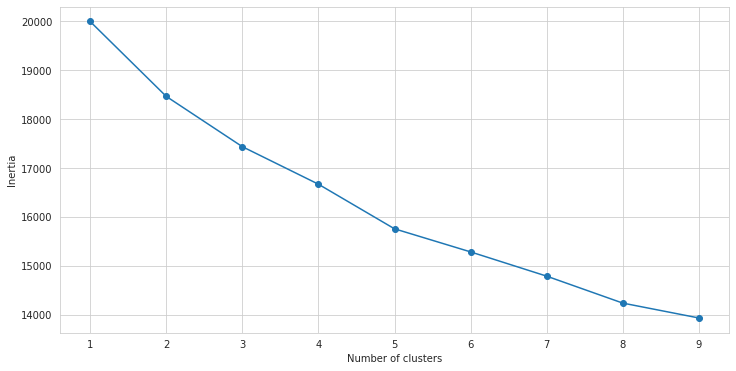

In [0]:
#with better elbow graph
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

#  plot results
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [0]:
# choosing 2 clusters to find clusters for goods or bads
kmeans = KMeans(n_clusters=2, init='k-means++')

In [0]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# check centroids
kmeans.cluster_centers_

array([[ 0.08630099,  0.51169339, -0.20179008, -0.17274402,  0.48337087,
         0.17281488, -0.13288982,  0.15190838,  0.32312   ,  0.00972913,
         0.26800986,  0.21762449,  0.37724257,  0.01491803, -0.39860658,
         0.22769203, -0.44297365,  0.04539475,  0.62337822,  0.17272776],
       [-0.07204945, -0.42719356,  0.16846695,  0.14421748, -0.40354816,
        -0.14427664,  0.11094471, -0.12682259, -0.26976073, -0.00812248,
        -0.22375135, -0.1816865 , -0.31494563, -0.0124545 ,  0.33278164,
        -0.19009151,  0.36982204, -0.03789837, -0.52043503, -0.14420391]])

In [0]:
#kmeans.predict(X)
# predict and save resulting clusters in our dataset 
df3['cluster_kmeans'] = kmeans.predict(X)

In [0]:
df3

,credit_risk,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,cluster_kmeans
0,0,1,6,1,4,1169,4,0,4,3,2,4,2,67,1,1,2,1,1,1,1,0
1,1,0,48,3,4,5951,1,2,2,0,2,2,2,22,1,1,1,1,1,0,1,1
2,0,3,12,1,0,2096,1,3,2,3,2,3,2,49,1,1,1,3,2,0,1,1
3,0,1,42,3,7,7882,1,3,2,3,1,4,0,45,1,0,1,1,2,0,1,0
4,1,1,24,2,2,4870,1,2,3,3,2,4,3,53,1,0,2,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3,12,3,7,1736,1,3,3,0,2,4,2,31,1,1,1,3,1,0,1,1
996,0,1,30,3,3,3857,1,2,4,1,2,4,0,40,1,1,1,0,1,1,1,0
997,0,3,12,3,4,804,1,0,4,3,2,4,1,38,1,1,1,1,1,0,1,1
998,1,1,45,3,4,1845,1,2,4,3,2,4,3,23,1,0,1,1,1,1,1,0


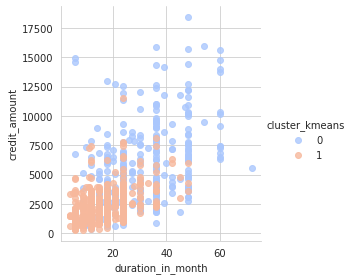

In [0]:
# check predicted clusters visually
sns.set_style('whitegrid')
sns.lmplot('duration_in_month','credit_amount',data=df3, hue='cluster_kmeans',
           palette='coolwarm',height=4,aspect=1,fit_reg=False)

In [0]:
# check silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.07822048652254916

In [0]:
# check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(df3['credit_risk'], df3['cluster_kmeans'])

0.465

In [0]:
# check statistics
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df3['credit_risk'], kmeans.labels_))
print(classification_report(df3['credit_risk'], kmeans.labels_))

[[310 390]
 [145 155]]
              precision    recall  f1-score   support

           0       0.68      0.44      0.54       700
           1       0.28      0.52      0.37       300

    accuracy                           0.47      1000
   macro avg       0.48      0.48      0.45      1000
weighted avg       0.56      0.47      0.49      1000



In [0]:
df3.drop('cluster_kmeans',axis=1)

,credit_risk,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,1,4,1169,4,0,4,3,2,4,2,67,1,1,2,1,1,1,1
1,1,0,48,3,4,5951,1,2,2,0,2,2,2,22,1,1,1,1,1,0,1
2,0,3,12,1,0,2096,1,3,2,3,2,3,2,49,1,1,1,3,2,0,1
3,0,1,42,3,7,7882,1,3,2,3,1,4,0,45,1,0,1,1,2,0,1
4,1,1,24,2,2,4870,1,2,3,3,2,4,3,53,1,0,2,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3,12,3,7,1736,1,3,3,0,2,4,2,31,1,1,1,3,1,0,1
996,0,1,30,3,3,3857,1,2,4,1,2,4,0,40,1,1,1,0,1,1,1
997,0,3,12,3,4,804,1,0,4,3,2,4,1,38,1,1,1,1,1,0,1
998,1,1,45,3,4,1845,1,2,4,3,2,4,3,23,1,0,1,1,1,1,1


# 3. Applying GMM

In [0]:
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
#import seaborn as sns
#sns.set()

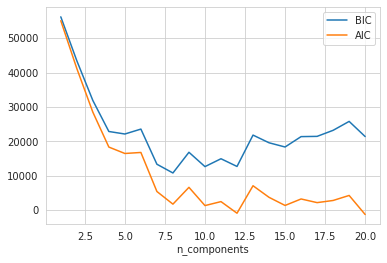

In [0]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [0]:
gmm = GaussianMixture(n_components=2)
df1 = df3[['duration_in_month','credit_amount']]
X2 = df1.values
gmm.fit(X2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

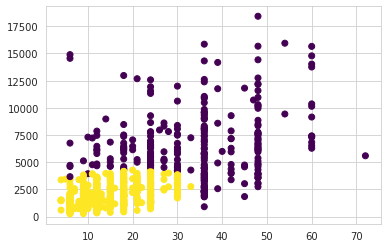

In [0]:
labels = gmm.predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='viridis');

In [0]:
print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[  32.29855747 6301.16326976]
 [  15.79505718 1913.13375757]]


[[[1.74626050e+02 1.19756976e+04]
  [1.19756976e+04 1.03808113e+07]]

 [[4.78119223e+01 2.99689383e+03]
  [2.99689383e+03 9.15226541e+05]]]


# 4. Applying Linear Regression

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [0]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_lm = lm.predict(X_test)

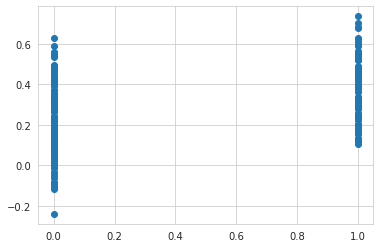

In [0]:
# check visually predictions vs actual values
plt.scatter(y_test,y_pred_lm)

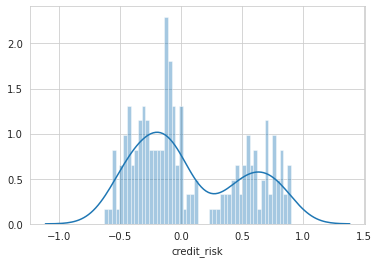

In [0]:
sns.distplot((y_test-y_pred_lm),bins=50);

In [0]:
# check different metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lm))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lm)))

MAE: 0.3701354890077914
MSE: 0.19652313744287248
RMSE: 0.4433093022291236


In [0]:
print(classification_report(y_test,y_pred_lm.round()))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       131
           1       0.68      0.25      0.36        69

    accuracy                           0.70       200
   macro avg       0.69      0.59      0.58       200
weighted avg       0.69      0.70      0.65       200



In [0]:
# Create and print confusion matrix    
abclf_cm = confusion_matrix(y_test,y_pred_lm.round(), normalize=None)
print(abclf_cm)

[[123   8]
 [ 52  17]]


In [0]:
lm_accuracy = metrics.accuracy_score(y_test, y_pred_lm.round())
# Adding the accuracy of LinearRegression to the accuracy_dictionary
accuracy_dictionary['LiR'] = lm_accuracy

print("Accuracy:",lm_accuracy)

Accuracy: 0.7


# 5. Applying Logistic Regression

In [0]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_logmodel = logmodel.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred_logmodel))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       131
           1       0.61      0.28      0.38        69

    accuracy                           0.69       200
   macro avg       0.66      0.59      0.59       200
weighted avg       0.67      0.69      0.65       200



In [0]:
print(confusion_matrix(y_test,y_pred_logmodel))

[[119  12]
 [ 50  19]]


In [0]:
print('Score:', logmodel.score(X_test, y_test))

Score: 0.69


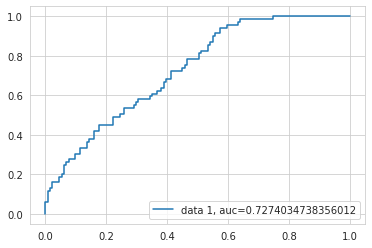

In [0]:
from sklearn import metrics
y_pred_logmodel_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_logmodel_proba)
auc = metrics.roc_auc_score(y_test, y_pred_logmodel_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
# we might add this data to our data set to give us the probability
print("Probability distrubution of the target value:", y_pred_logmodel_proba.view)

Probability distrubution of the target value: <built-in method view of numpy.ndarray object at 0x7fbe458c5da0>


** Cross validation K-fold**

In [0]:
# cross validation K-fold
from sklearn.model_selection import KFold,cross_val_score
scores = [] 
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train2, X_test2 = X.iloc[train_index], X.iloc[test_index]
    y_train2, y_test2 = y.iloc[train_index], y.iloc[test_index]
    logmodel.fit(X_train2, y_train2)
    y_pred_logmodel2 = logmodel.predict(X_test)
    scores.append(logmodel.score(X_test2, y_test2))

In [0]:
print(np.mean(scores))

0.7270000000000001


In [0]:
logmodel_accuracy = metrics.accuracy_score(y_test, y_pred_logmodel)
# Adding the accuracy of LogisticRegression to the accuracy_dictionary
accuracy_dictionary['LR'] = logmodel_accuracy

print("Accuracy:",lm_accuracy)

Accuracy: 0.7


# 6. Applying Gaussian Naive Bayes

In [0]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_gnb = gnb.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       131
           1       0.58      0.52      0.55        69

    accuracy                           0.70       200
   macro avg       0.67      0.66      0.67       200
weighted avg       0.70      0.70      0.70       200



In [0]:
print(confusion_matrix(y_test,y_pred_gnb))

[[105  26]
 [ 33  36]]


In [0]:
print('Score:', gnb.score(X_test, y_test))

Score: 0.705


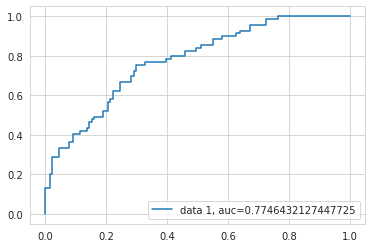

In [0]:
y_pred_gnb_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
auc = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
# cross validation K-fold
scores = [] 
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train2, X_test2 = X.iloc[train_index], X.iloc[test_index]
    y_train2, y_test2 = y.iloc[train_index], y.iloc[test_index]
    gnb.fit(X_train2, y_train2)
    scores.append(gnb.score(X_test2, y_test2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
print(np.mean(scores))

0.694


In [0]:
gnb_accuracy = metrics.accuracy_score(y_test, y_pred_gnb)
# Adding the accuracy of GaussianNB to the accuracy_dictionary
accuracy_dictionary['NB'] = gnb_accuracy

print("Accuracy:",gnb_accuracy)

Accuracy: 0.705


# 7. Applying Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred_rfc = rfc.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81       131
           1       0.70      0.28      0.40        69

    accuracy                           0.71       200
   macro avg       0.71      0.61      0.60       200
weighted avg       0.71      0.71      0.67       200



In [0]:
print(confusion_matrix(y_test,y_pred_rfc))

[[123   8]
 [ 50  19]]


In [0]:
print('Score:', rfc.score(X_test, y_test))

Score: 0.71


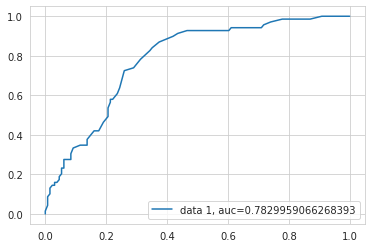

In [0]:
y_pred_rfc_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_rfc_proba)
auc = metrics.roc_auc_score(y_test, y_pred_rfc_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
# cross validation K-fold
scores = [] 
cv = KFold(n_splits=10, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train2, X_test2 = X.iloc[train_index], X.iloc[test_index]
    y_train2, y_test2 = y.iloc[train_index], y.iloc[test_index]
    rfc.fit(X_train2, y_train2)
    scores.append(rfc.score(X_test2, y_test2))

In [0]:
print(np.mean(scores))

0.76


In [0]:
rfc_accuracy = metrics.accuracy_score(y_test, y_pred_rfc)
# Adding the accuracy of RandomForest to the accuracy_dictionary
accuracy_dictionary['RF'] = rfc_accuracy

print("Accuracy:",rfc_accuracy)

Accuracy: 0.71


# 8. Applying KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

**Finding the best K in KNN to have a high accuracy**

In [0]:
# trying running from k=1 trough 30 and recording the test accuracy 
k_range = range(1,31)
score = {}
score_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors= k)
  knn.fit(X_train,y_train)
  y_pred_knn = knn.predict(X_test)
  accu = metrics.accuracy_score(y_test,y_pred_knn)
  score[k] = accu
  score_list.append(accu)

In [0]:
k_max = score_list.index(max(score_list)) + 1
print("K with maximum accuracy: ", k_max)
max(score_list)

K with maximum accuracy:  4


0.695

Text(0, 0.5, 'Testing accuracy')

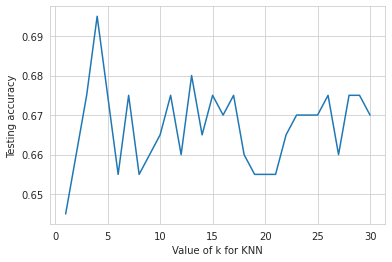

In [0]:
# ploting the relationship between k and the testing accuracy
plt.plot(k_range,score_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing accuracy')

In [0]:
knn = KNeighborsClassifier(n_neighbors= 4)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred_knn)

0.695

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.70      0.95      0.80       131
           1       0.68      0.22      0.33        69

    accuracy                           0.69       200
   macro avg       0.69      0.58      0.57       200
weighted avg       0.69      0.69      0.64       200



In [0]:
print(confusion_matrix(y_test,y_pred_knn))

[[124   7]
 [ 54  15]]


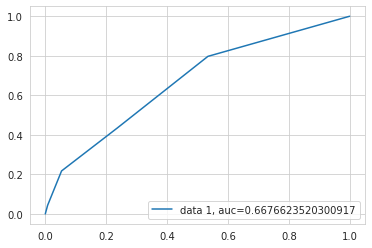

In [0]:
y_pred_knn_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
auc = metrics.roc_auc_score(y_test, y_pred_knn_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
# Adding the accuracy of KNeighbors to the accuracy_dictionary
accuracy_dictionary['KNN'] = knn_accuracy

print("Accuracy:",knn_accuracy)

Accuracy: 0.695


# 9. Applying SVM 

In [0]:
#Import svm model
from sklearn import svm
from sklearn.svm import SVC

In [0]:
#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = svm_clf.predict(X_test)

In [0]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.695


In [0]:
# Model Precision: what percentage of 'good' credit risk are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_svm))

# Model Recall: what percentage of 'good' credit risk are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_svm))

Precision: 0.7222222222222222
Recall: 0.18840579710144928


In [0]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.69      0.96      0.81       131
           1       0.72      0.19      0.30        69

    accuracy                           0.69       200
   macro avg       0.71      0.58      0.55       200
weighted avg       0.70      0.69      0.63       200



In [0]:
print(confusion_matrix(y_test,y_pred_svm))

[[126   5]
 [ 56  13]]


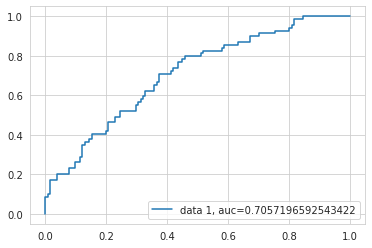

In [0]:
y_pred_svm_proba = svm_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc = metrics.roc_auc_score(y_test, y_pred_svm_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
svm_accuracy = metrics.accuracy_score(y_test, y_pred_svm)
# Adding the accuracy of SVM to the accuracy_dictionary
accuracy_dictionary['SVM'] = svm_accuracy

print("Accuracy:",svm_accuracy)

Accuracy: 0.695


# 10. Applying XGBoost

In [0]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

from xgboost import XGBClassifier

In [0]:
#data_dmatrix = xgb.DMatrix(data=X,label=y)

In [0]:
xgb_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

xgb_model.score(X_test,y_test)

0.7

In [0]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       131
           1       0.61      0.36      0.45        69

    accuracy                           0.70       200
   macro avg       0.67      0.62      0.62       200
weighted avg       0.68      0.70      0.68       200



In [0]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,y_pred_xgb)
print('\naccuracy_score on test dataset: ', accuracy_test)


accuracy_score on test dataset:  0.7


In [0]:
print(confusion_matrix(y_test,y_pred_xgb))

[[115  16]
 [ 44  25]]


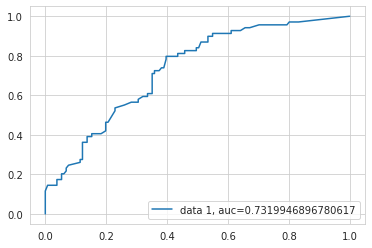

In [0]:
y_pred_xgboost_proba = xgb_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_xgboost_proba)
auc = metrics.roc_auc_score(y_test, y_pred_xgboost_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
xgb_accuracy = metrics.accuracy_score(y_test, y_pred_xgb)
# Adding the accuracy of XGboost to the accuracy_dictionary
accuracy_dictionary['XGB'] = xgb_accuracy

print("Accuracy:",xgb_accuracy)


Accuracy: 0.7


# Latent Variables and Latent Manifold Identification
One latent variable can be the number of times the applicant got loans and repay them. This can help to make a decison based on it. Also, how many time the applicant had overdue payment.


# Conclusion

# Comparing the algorithms based on cross_val_score and accuracy score

In [0]:
# to feed the random state
seed = 7

# prepare models
models = []
#models.append(('4. LiR', LinearRegression))
models.append(('5. LR', LogisticRegression()))
models.append(('6. NB', GaussianNB()))
models.append(('7. RF', RandomForestClassifier()))
models.append(('8. KNN', KNeighborsClassifier()))
models.append(('9. SVM', SVC(gamma='auto')))
models.append(('10. XGB', XGBClassifier()))

In [0]:

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

In [0]:
for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


5. LR: 0.355030 (0.068005)
6. NB: 0.544302 (0.090018)
7. RF: 0.372285 (0.071605)
8. KNN: 0.368552 (0.102997)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


9. SVM: 0.316765 (0.073526)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10. XGB: 0.456566 (0.059778)


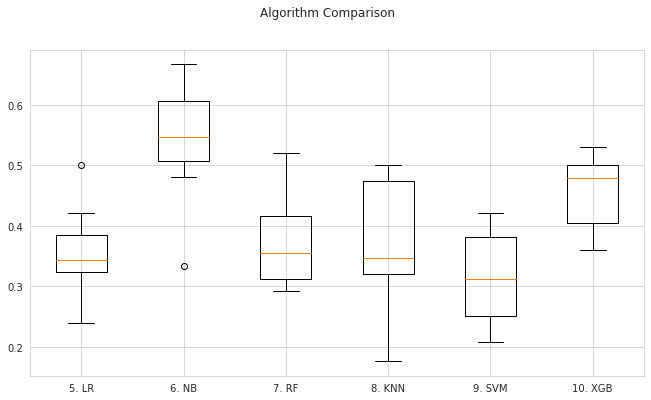

In [0]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
for name, model in models:
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# Comparing the algorithms based on accuracy score

In [0]:
print(accuracy_dictionary)

{'LiR': 0.7, 'LR': 0.69, 'NB': 0.705, 'RF': 0.71, 'KNN': 0.695, 'SVM': 0.695, 'XGB': 0.7}


<BarContainer object of 7 artists>

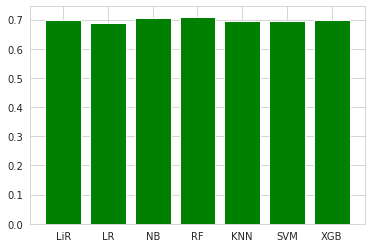

In [0]:
plt.bar(accuracy_dictionary.keys(), accuracy_dictionary.values(), color='g')


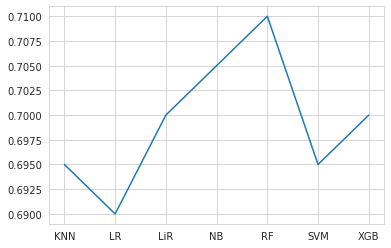

In [0]:
import matplotlib.pylab as plt

lists = sorted(accuracy_dictionary.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

Based on the outputs looks Random Forest model has highest accuracy